In [45]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [147]:
#load data
df = pd.read_csv("dataset.csv")

#check NaN values
print(df.isna().values.any())

#check total missing values
print(df.isnull().sum())

#remove unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

df.fillna(0)

True
id                        0
host_id                 238
host_name                46
host_response_time      850
host_response_rate      803
                      ...  
Unnamed: 86           13044
Unnamed: 87           13044
Unnamed: 88           13044
Unnamed: 89           13044
Unnamed: 90           13048
Length: 91, dtype: int64


,id,host_id,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood,...,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,number_of_reviews,number_of_reviews_ltm,review_scores_rating,reviews_per_month
0,35303,151977,Miyuki,0,0,0,Shibuya District,3,3,Shibuya District,...,28,1125,28,28,1125,1125,18,0,94,0.18
1,197677,964081,Yoshimi & Marek,within a few hours,100%,88%,Sumida District,1,1,Sumida District,...,3,365,3,3,365,365,165,11,95,1.57
2,289597,341577,Hide&Kei,within a few hours,100%,82%,Nerima District,2,2,Nerima District,...,28,180,1,30,180,180,113,7,95,1.18
3,370759,1573631,"Gilles,Mayumi,Taiki",within a day,100%,93%,Setagaya District,3,3,Setagaya District,...,28,720,28,28,720,720,103,5,95,1.39
4,700253,341577,Hide&Kei,within a few hours,100%,82%,Nerima District,2,2,Nerima District,...,28,180,1,28,180,180,103,3,96,1.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13044,43260549,191971770,Hostel,0,0,0,0,3,3,Chiyoda District,...,1,365,1,3,365,365,0,0,0,0
13045,43260684,191971770,Hostel,0,0,0,0,3,3,Chiyoda District,...,1,365,1,3,365,365,0,0,0,0
13046,43272924,335257890,Blue,within an hour,100%,100%,0,0,0,Shinjuku District,...,28,30,28,28,1125,1125,0,0,0,0
13047,43281694,333948576,Kido,0,0,0,0,0,0,Shibuya District,...,1,90,1,1,90,90,0,0,0,0


In [153]:
df['price'] = df["price"].replace('$', '')
df['extra_people'] = df["extra_people"].replace('$', '')

df.head(3)

# df1['Avg_Annual'] = df1['Avg_Annual'].astype(int)

for i in df:
    if df[i].dtypes == object:
        df[i] = pd.to_numeric(df[i], errors='coerce')



# df['host_id'] = pd.to_numeric(df['host_id'], errors='coerce')
# df['host_name'] = pd.to_numeric(df['host_name'], errors='coerce')
df.dtypes

id int64
host_id float64
host_name float64
host_response_time object
host_response_rate object
host_acceptance_rate object
host_neighbourhood object
host_listings_count object
host_total_listings_count object
neighbourhood object
neighbourhood_cleansed object
property_type object
room_type object
accommodates object
bathrooms object
bedrooms object
beds object
price object
guests_included object
extra_people object
minimum_nights object
maximum_nights object
minimum_minimum_nights object
maximum_minimum_nights object
minimum_maximum_nights object
maximum_maximum_nights object
number_of_reviews object
number_of_reviews_ltm object
review_scores_rating object
reviews_per_month object


id                             int64
host_id                      float64
host_name                    float64
host_response_time           float64
host_response_rate           float64
host_acceptance_rate         float64
host_neighbourhood           float64
host_listings_count          float64
host_total_listings_count    float64
neighbourhood                float64
neighbourhood_cleansed       float64
property_type                float64
room_type                    float64
accommodates                 float64
bathrooms                    float64
bedrooms                     float64
beds                         float64
price                        float64
guests_included              float64
extra_people                 float64
minimum_nights               float64
maximum_nights               float64
minimum_minimum_nights       float64
maximum_minimum_nights       float64
minimum_maximum_nights       float64
maximum_maximum_nights       float64
number_of_reviews            float64
n

In [34]:
#change some features datatype
df["host_id"] = df.host_id.astype(int)

ValueError: cannot convert float NaN to integer

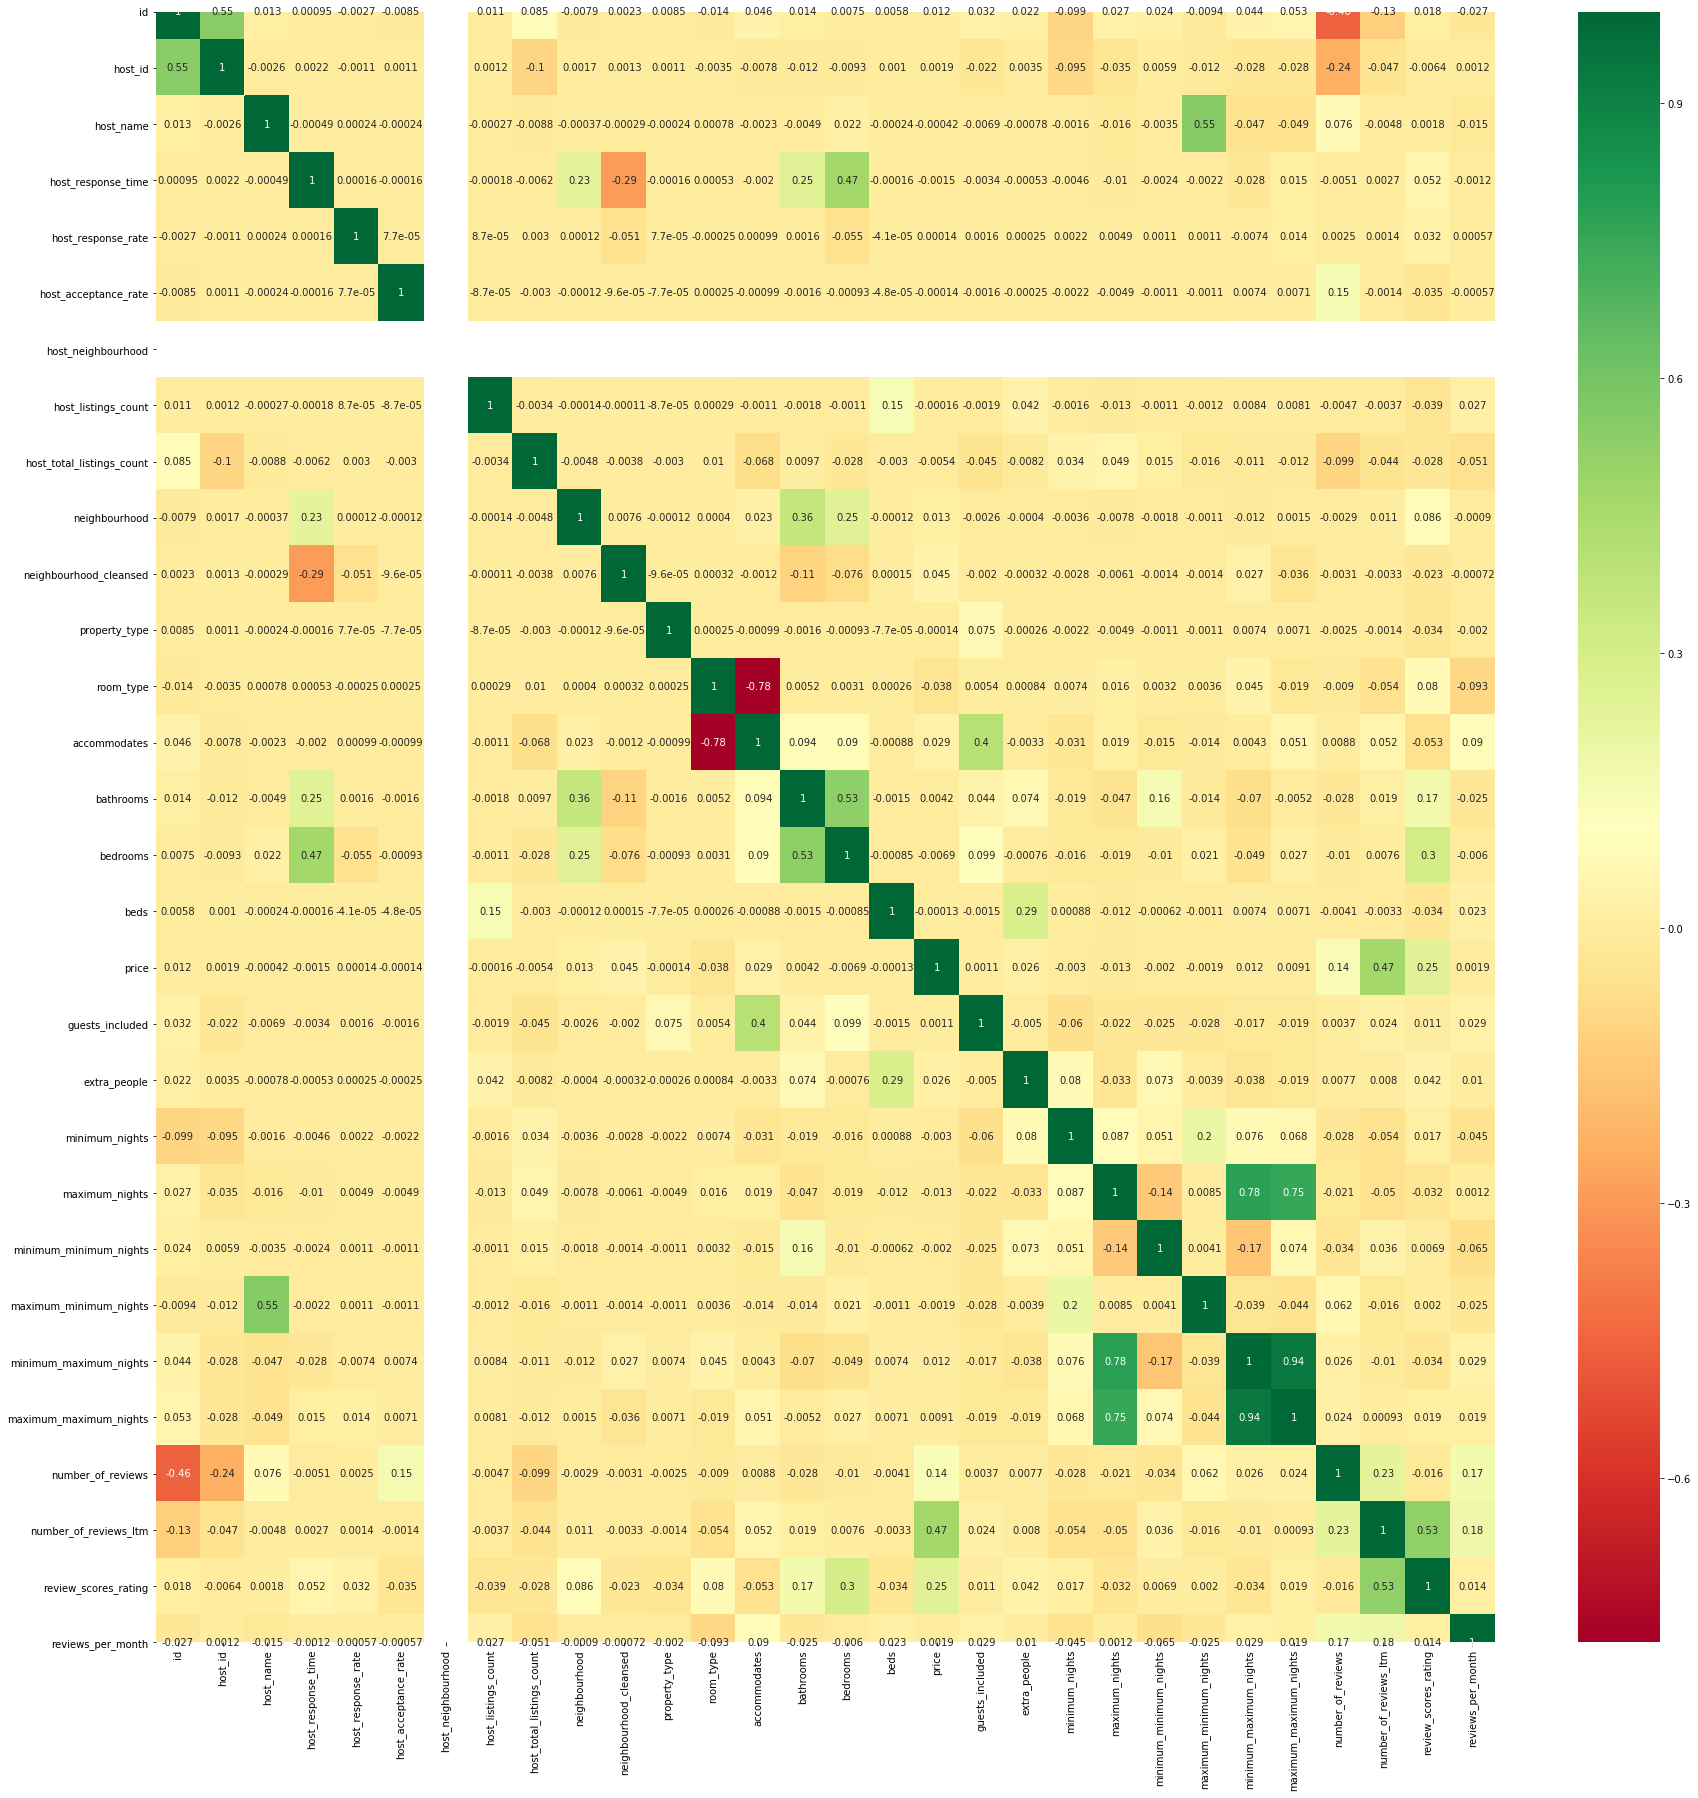

In [156]:
#find good features using correlation matrix heatmap
X = df.iloc[:, 0:29]
y = df["price"]

corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,30))
g = sb.heatmap(df[top_corr_features].corr(), annot=True, cmap="RdYlGn")

In [131]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13049 entries, 0 to 13048
Data columns (total 30 columns):
id                           13049 non-null int64
host_id                      12811 non-null object
host_name                    13003 non-null object
host_response_time           12199 non-null object
host_response_rate           12246 non-null object
host_acceptance_rate         12729 non-null object
host_neighbourhood           11234 non-null object
host_listings_count          12996 non-null object
host_total_listings_count    13028 non-null object
neighbourhood                11861 non-null object
neighbourhood_cleansed       13019 non-null object
property_type                13048 non-null object
room_type                    13045 non-null object
accommodates                 13046 non-null object
bathrooms                    13044 non-null object
bedrooms                     13028 non-null object
beds                         13015 non-null object
price                    

In [119]:
#No.2 logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score

lgr = LogisticRegression(C=0.01, solver="liblinear").fit(train[["accommodates", "beds"]], train["price"])

ValueError: could not convert string to float: 'Entire home/apt'

In [154]:
#data cleansing
for i in df:
    print(i, df[i].dtypes)
    if df[i].isna().values.any() and df[i].dtypes != object:
        df[i] = df[i].fillna(df[i].median())

train, test = train_test_split(df, test_size=0.2)

id int64
host_id float64
host_name float64
host_response_time float64
host_response_rate float64
host_acceptance_rate float64
host_neighbourhood float64
host_listings_count float64
host_total_listings_count float64
neighbourhood float64
neighbourhood_cleansed float64
property_type float64
room_type float64
accommodates float64
bathrooms float64
bedrooms float64
beds float64
price float64
guests_included float64
extra_people float64
minimum_nights float64
maximum_nights float64
minimum_minimum_nights float64
maximum_minimum_nights float64
minimum_maximum_nights float64
maximum_maximum_nights float64
number_of_reviews float64
number_of_reviews_ltm float64
review_scores_rating float64
reviews_per_month float64


In [ ]:
#convert some features from object to float
df['host_id'] = df['host_id'].astype(float)
